In [1]:
import pandas as pd
import numpy as np
import math
from pyecharts import options as opts
from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Timeline, Grid, Bar, Map, Pie, Line, Page
from pyecharts.faker import Faker
import matplotlib.pyplot as plt
from shapely.geometry import *
from shapely import affinity
import geopandas as gpd

%matplotlib inline

In [2]:
types_index = {
    "Blue": 0,
    "Light Purple-S1": 1,
    "Light Purple-S2": 2,
    "Light Purple-S3": 3,
    "Light Purple-S4": 4,
    "Light Purple-S5": 5,
    "Light Purple-S6": 6,
    "Light Purple-S7": 7,
    "Light Purple-S8": 8,
    "Light Purple-S9": 9,
    "Light Purple-S10": 10,
    "Orange-D2": 11,
    "Orange-D8": 12,
    "Orange-D9": 13,
    "Purple": 14,
    "WayPoints": 15
}
points_xy = [None for i in types_index]

In [3]:
for i in types_index.keys():
    points_xy[types_index[i]] = pd.read_csv("../Data/Original Points/" + i + ".csv", header = None)
    # c[0] is x, c[1] is y
    # r[i] is i + 1 in edges

In [4]:
edges = pd.read_csv("../Data/Edges/" + "edges_ver7" + ".csv", header = None)
# c[0] is point 1 dataset
# c[1] is point 1 row
# c[2] is point 2 dataset
# c[3] is point 2 dataset
# c[4] is edge type,
# 1 = normal road
# 2 = pavement
# 3 = bicycle
# 4 = unknown

In [5]:
edges

,0,1,2,3,4
0,WayPoints,79,WayPoints,80,1
1,WayPoints,79,WayPoints,80,1
2,WayPoints,79,WayPoints,82,1
3,WayPoints,82,WayPoints,81,1
4,WayPoints,80,WayPoints,81,1
...,...,...,...,...,...
240,WayPoints,32,WayPoints,27,1
241,WayPoints,32,WayPoints,116,1
242,WayPoints,97,WayPoints,102,1
243,WayPoints,94,WayPoints,93,3


In [6]:
colours = ["black", "red", "blue", "gray"]
linetps = ["-", "--", "--", "-"]
# 0 = normal road
# 1 = pavement
# 2 = bicycle
# 3 = unknown

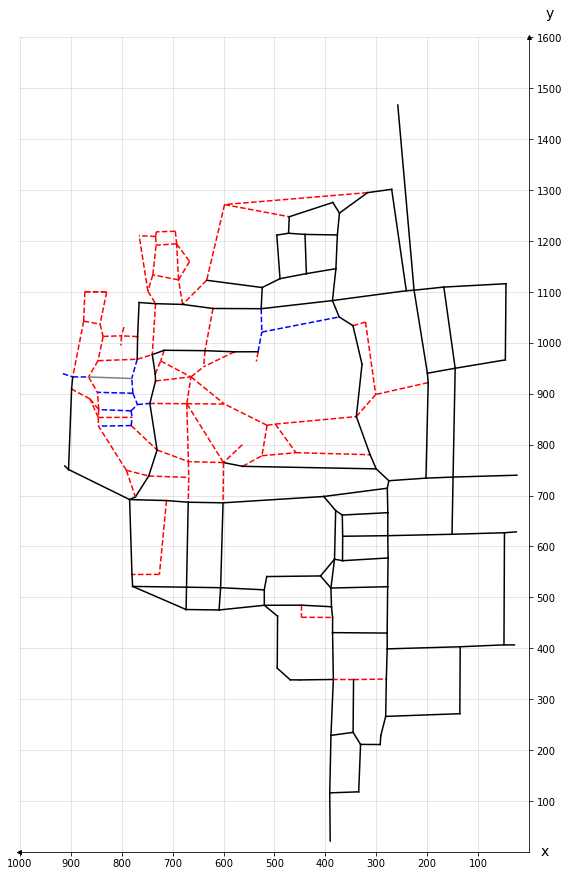

In [7]:
xmin, xmax, ymin, ymax = 0, 1000, 0, 1600

ticks_frequency = 100

fig, ax = plt.subplots(figsize = (10, 15))

ax.set(xlim = (xmin - 1, xmax + 1), ylim = (ymin - 1, ymax + 1), aspect = 'equal')

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('x', size = 14, labelpad = -24, x = 1.03)
ax.set_ylabel('y', size = 14, labelpad = -21, y = 1.02, rotation = 0)

x_ticks = np.arange(xmin, xmax + 1, ticks_frequency)
y_ticks = np.arange(ymin, ymax + 1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

ax.grid(which = 'both', color = 'grey', linewidth = 1, linestyle = '-', alpha = 0.2)

arrow_fmt = dict(markersize = 4, color='black', clip_on = False)
ax.plot((0), (0), marker = '<', transform = ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker = '^', transform = ax.get_xaxis_transform(), **arrow_fmt)

for index, row in edges.iterrows():
    startx = points_xy[types_index[row[0]]].iloc[row[1] - 1][0]
    starty = points_xy[types_index[row[0]]].iloc[row[1] - 1][1]
    endx = points_xy[types_index[row[2]]].iloc[row[3] - 1][0]
    endy = points_xy[types_index[row[2]]].iloc[row[3] - 1][1]
    colour = colours[row[4]]
    linetp = linetps[row[4]]
    ax.plot([startx, endx], [starty, endy], c = colour, ls = linetp, lw = 1.5, alpha = 1)
    
ax.invert_xaxis()
ax.yaxis.tick_right()

plt.savefig("../Image/map.jpg")
plt.show()